# APS 1 - Aletas

### Realizando os imports

In [1]:
from math import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Definindo parâmetros

Seleciona-se a secção transversal da aleta retangular, bem como os parâmetros de cálculo.

In [2]:
L = 0.2 # Comprimento da aleta [m]
t = 0.002 # Espessura da aleta [m]
w = 0.24 # Largura da aleta [m]

P = 2*t + 2*w # Perímetro da seção transversal [m]

h = 20 # Coeficiente de convecção em [W/(m^2 * K)]

A_Lt = L * t # Área lateral [m^2]
A_wt = w * t # Área frontal [m^2]
A_Lw = L * w # Área da base [m^2]
A_ext = (2 * A_Lt) + A_wt + (2 * A_Lw) # Área da superfície externa [m^2]

k_al = 240 # Condutividade do material em [W/(m * K)]
T_inf = 25+273 # Temperatura do ambiente [K]
T_b = 100+273 # temperatura da base [K]
x = L # Condição de contorno na extremidade da aleta [m]

### Questão I.1 
Qual a temperatura na extremidade da aleta (```T_al```)? Apresente um gráfico da distribuição de temperatura (```T_analitica```) ao longo do comprimento da aleta. Use legenda, identifique os eixos e as unidades usadas.

In [3]:
def calcula_temperatura_pontual_aleta(h, P, k, A, L, x, T_b, T_inf):
    """
    Output: T_al (temperatura em um ponto `x` do caso de transferência de calor por convecção)
    """
    m = sqrt((h*P)/(k*A)) # Constante de Fourier
    hmk = h / (m * k) # abstração de valor repetido
    distribuicao_de_temperaturas = (cosh(m * (L - x)) + hmk * sinh(m * (L - x))) / (cosh(m * L) + hmk * sinh(m * L))
    T_al = (distribuicao_de_temperaturas * (T_b - T_inf)) + T_inf
    return T_al

In [4]:
T_al_ext = calcula_temperatura_pontual_aleta(h, P, k_al, A_wt, L, x, T_b, T_inf) # Temperatura na extremidade da aleta [K]
print(f"Temperatura na extremidade da aleta: {round(T_al_ext, 3)} K")

Temperatura na extremidade da aleta: 321.184 K


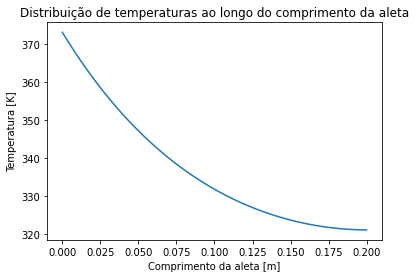

In [5]:
# Gráfico da distribuição de temperaturas ao longo do comprimento da aleta

l_aleta_dist_temp = []
step=0.001; l_aleta_x = np.arange(0, L+step, step)

for x in l_aleta_x:
    T_al = (calcula_temperatura_pontual_aleta(h, P, k_al, A_wt, L, x, T_b, T_inf))
    l_aleta_dist_temp.append(T_al)

# plote o gráfico com eixo x sendo ``l_aleta_x`` e eixo y sendo ``l_aleta_dist_temp``
plt.plot(l_aleta_x, l_aleta_dist_temp)
plt.xlabel("Comprimento da aleta [m]")
plt.ylabel("Temperatura [K]")
plt.title("Distribuição de temperaturas ao longo do comprimento da aleta")
plt.show()

### Questão I.2
Determine a taxa de transferência de calor.

In [6]:

def calcula_transferencia_de_calor(h, P, k, A, L, x, T_inf, T_b):
    """
    Output: taxa de transferência de calor por convecção
    """
    M = sqrt(h*P*k*A) * (T_b - T_inf)
    m = sqrt((h*P)/(k*A))
    hmk = h / (m * k)
    taxa_transferencia_de_calor = M * (sinh(m * L) + hmk * cosh(m * L) / cosh(m * L) + hmk * sinh(m * L))
    return taxa_transferencia_de_calor

taxa_transferencia_de_calor = calcula_transferencia_de_calor(h, P, k_al, A_wt, L, x, T_inf, T_b)

print(f"Taxa de transferência de calor: {round(taxa_transferencia_de_calor,3)} W")


Taxa de transferência de calor: 244.269 W


### Questão I.3
Determine a eficiência da aleta.

In [7]:
eficiencia = taxa_transferencia_de_calor/(h * A_ext * (T_b - T_inf))
print(f"Eficiênica da aleta: {round(eficiencia,3)}")

Eficiênica da aleta: 1.674


### Questão I.4
Determine a efetividade da aleta.

In [8]:
efetividade = taxa_transferencia_de_calor/(h * A_wt * (T_b - T_inf))
print(f"Efetividade: {round(efetividade,3)}")

Efetividade: 339.263


### Questão I.5
Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor.

In [9]:
taxa_transferencia_de_calor_aleta_infinita = ((h * P * k_al * A_wt)**0.5) * (T_b - T_inf)
print(f"Taxa de transferência de calor: {round(taxa_transferencia_de_calor_aleta_infinita,3)} W, considerando a aleta infinita")

Taxa de transferência de calor: 79.2 W, considerando a aleta infinita


### Questão I.6
Compare o resultado obtido no item 2 com o resultado do item 5, assumindo que foram 
obtidos com modelos diferentes.

In [10]:
print(f"O resultado obtido em I.2 foi 3 vezes maior que em I.5, sendo:\n\n - a taxa de transferência de calor da aleta finita: {round(taxa_transferencia_de_calor,3)} W;\n - e da aleta infinita {taxa_transferencia_de_calor_aleta_infinita} W;\n\nDevendo se ao fato de `tanh` da taxa de transferência de calor não tender a 1, que seria o fenômeno esperado.")

O resultado obtido em I.2 foi 3 vezes maior que em I.5, sendo:

 - a taxa de transferência de calor da aleta finita: 244.269 W;
 - e da aleta infinita 79.2 W;

Devendo se ao fato de `tanh` da taxa de transferência de calor não tender a 1, que seria o fenômeno esperado.


### Questão I.7
Apresente o desenvolvimento matemático para determinar qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a taxa de transferência de calor.

Para uma aleta infinita, temos que: 

$\theta_L = 0$;

$T(L) = T_{amb}$.

Portanto, podemos considerar uma condição adiabática na extremidade da aleta. Com isso, concluímos que:

$M \approx M \cdot \tanh(m \cdot L)$

$\tanh(m \cdot L) \geq 0.99$


In [11]:
m = ((h*P)/(k_al*A_wt))**0.5 # Constante de Fourier
L_minimo = atanh(0.99)/m
print(f"O comprimento mínimo que a aleta deve adotar é: {round(L_minimo,3)} m.")

O comprimento mínimo que a aleta deve adotar é: 0.289 m.
